## Here we'll discuss on the different ways to handle missing data

#### Importing Pandas & Numpy

In [1]:
import pandas as pd
import numpy as np

#### Reading Titanic dataset

In [2]:
titanic_df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Finding out the missing data columns

In [201]:
titanic_df['Age'].isnull().sum()

177

#### Check the stats of 'Age' column which has missing data

In [3]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [178]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### There are 3 ways in which we can handle missing data.
    1. Mean Method
    2. MICE Method
    3. KNN Method

### 1. Mean Method

#### Preparing a copy of the Original Dataset on which we'll perform the operations

In [51]:
agemean_df=titanic_df.copy()
agemean_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Creating a new variable 'Age_mean' in which we'll store the mean value of age which can be used as a replacement for missing data

In [95]:
agemean_df['Age_mean']=agemean_df['Age'].fillna(agemean_df['Age'].mean())
agemean_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


#### Checking if there are any missing values in the age_mean column of the dataframe

In [96]:
agemean_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
dtype: int64

#### Fetching stats post performing Mean Method on the Age data

In [102]:
agemean_df['Age_mean'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age_mean, dtype: float64

#### Importing necessary packages for plotting

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Plotting a KDE for Age & Age_mean columns of the dataframe to see if there is an difference in the distrbution curve

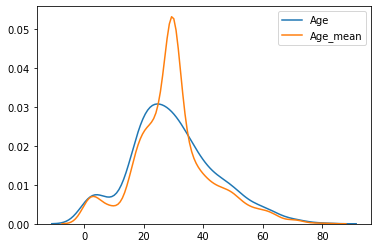

In [180]:
sns.kdeplot(titanic_df['Age'])
sns.kdeplot(agemean_df['Age_mean'])
plt.show()

### From the above plot & stats for age & age_mean column we can say that, standard deviation, 25%, 50% & 75% have increase by using mean for missing data of age.

#### To handle this problem of standard deviation of increase upon using Mean method, let us try to see the effect of MICE Method on the data 

### 2. MICE Method

#### Installing the impyute pip

In [45]:
pip install impyute

#### Import MICE method from the impyute package, drop unnecessary fields & impute the values of missing data.

In [192]:
from impyute.imputation.cs import mice
x=titanic_df.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked'],axis=1)
imputed=mice(x.values)
mice_ages=imputed[:,2]

#### Creating Dataframe from the age value prediceted and stored above in mice_ages variable.
#### Fetching stats for the age predicted/imputed via MICE method

In [188]:
miceages_df=pd.DataFrame(mice_ages)
miceages_df.rename(columns={0:"Age_MICE"},inplace=True)
miceages_df.describe()

,Age_MICE
count,891.000000
mean,29.280489
std,13.629174
min,-6.716412
25%,22.000000
50%,27.560937
75%,36.000000
max,80.000000


#### From the above stats we can see that min is -6.7. Age cannot be negative, so let us replace negative values with 0

In [114]:
mice_ages = [0 if age < 0 else age for age in mice_ages]

#### Create Dataframe for the new values in mice_ages and fetch the stats for the new age column i.e., for Age_MICE column

In [115]:
miceages_df=pd.DataFrame(mice_ages)
miceages_df.rename(columns={0:"Age_MICE"},inplace=True)
miceages_df.describe()

,Age_MICE
count,891.000000
mean,29.332868
std,13.503008
min,0.000000
25%,22.000000
50%,27.560937
75%,36.000000
max,80.000000


#### Let us plot a KDE graph between the original Age, Mean Age i.e., Age determined from Mean Method & MICE Age i.e., age predicted from MICE Method

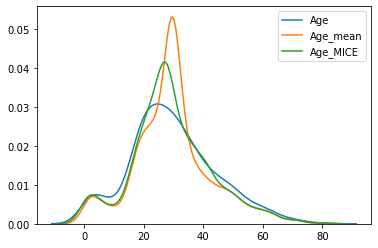

In [116]:
sns.kdeplot(titanic_df['Age'])
sns.kdeplot(agemean_df['Age_mean'])
sns.kdeplot(miceages_df['Age_MICE'])
plt.show()

#### From the above plot we can say that MICE Method performance is better when compared to Mean method for missing data.

### 3. KNN Method for missing data

#### Creating a copy from the Original dataframe on which we perform operations.

#### Drop irrelevant columns

In [170]:
knn_df=titanic_df.copy()
knn_df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)
knn_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


#### Checking the missing value columns in dataframe

In [171]:
knn_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

#### Import KNNImputer method from the impute package, select a random number for n_neighbours i.e., for n nearest neighbours, fit & transform the data and convert output to DataFrame

In [172]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(knn_df)
df_imputed = pd.DataFrame(imputed, columns=knn_df.columns)

In [195]:
df_imputed.rename(columns={'Age':'Age_KNN'},inplace=True)
df_imputed.head()

,PassengerId,Survived,Pclass,Age_KNN,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500


#### Checking for missing values in DataFrame

In [174]:
df_imputed.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

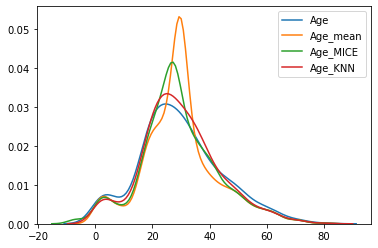

In [196]:
sns.kdeplot(titanic_df['Age'])
sns.kdeplot(agemean_df['Age_mean'])
sns.kdeplot(miceages_df['Age_MICE'])
sns.kdeplot(df_imputed['Age_KNN'])
plt.show()

### From the above KDE plot you can say that KNN Method for missing data is performing far better than the other 2 methods.

#### The below code is to see the error i.e., difference between Original value and the predicted value (by KNN method) using RMSE Model Evaluation Method

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [199]:
def optimize_k(data, target):
    errors = []
    for k in range(1, 180, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=knn_df.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [200]:
k_errors = optimize_k(data=knn_df, target='Survived')
k_errors

[{'K': 1, 'RMSE': 0.4302234056521678},
 {'K': 3, 'RMSE': 0.424075069774762},
 {'K': 5, 'RMSE': 0.4233914680240152},
 {'K': 7, 'RMSE': 0.43632799922194765},
 {'K': 9, 'RMSE': 0.42390970894847657},
 {'K': 11, 'RMSE': 0.4196606769747228},
 {'K': 13, 'RMSE': 0.4271112528912914},
 {'K': 15, 'RMSE': 0.42551447664257236},
 {'K': 17, 'RMSE': 0.4199647497843748},
 {'K': 19, 'RMSE': 0.42472140063390323},
 {'K': 21, 'RMSE': 0.42839638617424264},
 {'K': 23, 'RMSE': 0.42075749726936523},
 {'K': 25, 'RMSE': 0.4260793064899942},
 {'K': 27, 'RMSE': 0.4190492031216281},
 {'K': 29, 'RMSE': 0.4262320295528713},
 {'K': 31, 'RMSE': 0.4301740585744229},
 {'K': 33, 'RMSE': 0.42699809636774255},
 {'K': 35, 'RMSE': 0.4250382828633691},
 {'K': 37, 'RMSE': 0.4195155492820087},
 {'K': 39, 'RMSE': 0.4235649449256069},
 {'K': 41, 'RMSE': 0.42831226534859435},
 {'K': 43, 'RMSE': 0.4235919824521769},
 {'K': 45, 'RMSE': 0.42502251008412756},
 {'K': 47, 'RMSE': 0.416905332019059},
 {'K': 49, 'RMSE': 0.4162233768559147}